In [131]:
import pandas as pd
from scipy import stats
import seaborn as sns

In [132]:
nyc = pd.read_csv('data.csv')
nyc

,Date,Value,Anomaly
0,189501,29.1,-2.7
1,189601,28.7,-3.1
2,189701,29.5,-2.3
3,189801,34.1,2.3
4,189901,30.1,-1.7
...,...,...,...
119,201401,28.7,-3.1
120,201501,30.0,-1.8
121,201601,34.5,2.7
122,201701,38.1,6.3


In [133]:
nyc.columns = ['Date', 'Fahrenheit', 'Anomaly']
nyc.drop('Anomaly', axis=1, inplace=True)
nyc.head()

,Date,Fahrenheit
0,189501,29.1
1,189601,28.7
2,189701,29.5
3,189801,34.1
4,189901,30.1


In [134]:
nyc.Date.dtype

dtype('int64')

In [135]:
nyc.Date = nyc.Date.floordiv(100)
nyc.head()

,Date,Fahrenheit
0,1895,29.1
1,1896,28.7
2,1897,29.5
3,1898,34.1
4,1899,30.1


In [136]:
pd.set_option('precision', 2)
nyc.Fahrenheit.describe()

count    124.00
mean      31.98
std        4.46
min       21.30
25%       29.10
50%       31.75
75%       34.92
max       43.00
Name: Fahrenheit, dtype: float64

In [137]:
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Fahrenheit)
print(linear_regression.slope, linear_regression.intercept)

0.01809409913453973 -3.42045979543666


In [138]:
for i in range(2019, 2023):
    print(f'Jan {i} - {round(linear_regression.intercept + linear_regression.slope * i, 2)} °F')

Jan 2019 - 33.11 °F
Jan 2020 - 33.13 °F
Jan 2021 - 33.15 °F
Jan 2022 - 33.17 °F


In [139]:
for i in range(1891, 1895):
    print(f'Jan {i} - {round(linear_regression.intercept + linear_regression.slope * i, 2)} °F')

Jan 1891 - 30.8 °F
Jan 1892 - 30.81 °F
Jan 1893 - 30.83 °F
Jan 1894 - 30.85 °F


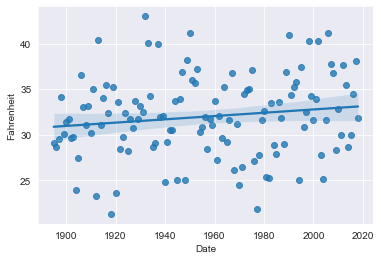

In [141]:
sns.set_style('darkgrid')
axes = sns.regplot(x='Date', y='Fahrenheit', data=nyc)

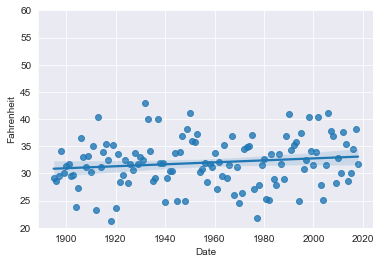

In [142]:
axes.set_ylim(20, 60)
axes.get_figure()

In [143]:
nyc['Celsius'] = pd.Series(map(lambda f: 5 / 9 * (f - 32), nyc.Fahrenheit), dtype=float)
nyc

,Date,Fahrenheit,Celsius
0,1895,29.1,-1.61
1,1896,28.7,-1.83
2,1897,29.5,-1.39
3,1898,34.1,1.17
4,1899,30.1,-1.06
...,...,...,...
119,2014,28.7,-1.83
120,2015,30.0,-1.11
121,2016,34.5,1.39
122,2017,38.1,3.39


In [144]:
nyc.Celsius.describe()

count    124.00
mean      -0.01
std        2.48
min       -5.94
25%       -1.61
50%       -0.14
75%        1.62
max        6.11
Name: Celsius, dtype: float64